# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Linear-Regression-problem" data-toc-modified-id="Linear-Regression-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression problem</a></div><div class="lev1 toc-item"><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gradient Descent</a></div><div class="lev1 toc-item"><a href="#Gradient-Descent---Classification" data-toc-modified-id="Gradient-Descent---Classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gradient Descent - Classification</a></div><div class="lev1 toc-item"><a href="#Gradient-descent-with-numpy" data-toc-modified-id="Gradient-descent-with-numpy-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gradient descent with numpy</a></div>

In [1]:
%matplotlib inline
from fastai import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

In [2]:
#Init ramdomness...
np.random.seed(2)

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [3]:
n=200

In [4]:
# Expected parameters values
to_find = tensor(3.,2.);

In [5]:
x = torch.ones(n,2) 
x[:,0].uniform_()
x[:5]

tensor([[0.3655, 1.0000],
        [0.5784, 1.0000],
        [0.4522, 1.0000],
        [0.2590, 1.0000],
        [0.3005, 1.0000]])

**IMPORTANT**: the sample values of tensor 'y' should be CONSTANT and do not have gradient! 
In othe words, we cannot have any term of type "torch.Parameter" in the expression of 'y' and 'x'. 

Otherwise we're going to have errors like this in the train loop:

```python
a = nn.Parameter(tensor(2.,2.))
y = x@a + torch.ones(n).uniform_(-1, 1)
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))

... gives you ...

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
```

In [6]:
y = x@to_find + torch.ones(n).uniform_(-1, 1)

In [7]:
y.shape

torch.Size([200])

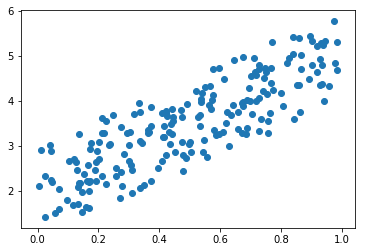

In [8]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [9]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [10]:
a = tensor(-1.,1)

In [11]:
y_hat = x@a
mse(y_hat, y)

tensor(10.3697)

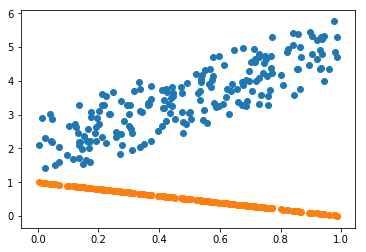

In [12]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [13]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [14]:
lr = 3e-1

In [15]:
def update(params: nn.Parameter, x:Tensor, y:Tensor, error_function, lr: float):
    y_hat = x@params
    loss = error_function(y, y_hat)
    loss.backward()
    with torch.no_grad():
        # Edit in place to accomodate the case when params is BIG
        params.sub_(lr * params.grad)
        params.grad.zero_()
    return (loss, params)

In [16]:
#Test
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))

Loss =  (tensor(10.3697, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.0618, 2.7870], requires_grad=True))
Loss =  (tensor(1.3929, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.3919, 3.1870], requires_grad=True))
Loss =  (tensor(0.8213, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.5406, 3.2492], requires_grad=True))
Loss =  (tensor(0.7547, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.6426, 3.2300], requires_grad=True))
Loss =  (tensor(0.7205, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.7309, 3.1921], requires_grad=True))


In [17]:
lr = 5e-1
for t in range(100): 
    loss, params=update(a, x, y, mse, lr)
    if(0==(t % 10)):  print(str(loss),str(params))
print(a)

tensor(0.6904, grad_fn=<MeanBackward1>) Parameter containing:
tensor([0.8687, 3.1232], requires_grad=True)
tensor(0.4052, grad_fn=<MeanBackward1>) Parameter containing:
tensor([1.8648, 2.6001], requires_grad=True)
tensor(0.3189, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.4127, 2.3127], requires_grad=True)
tensor(0.2929, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.7139, 2.1547], requires_grad=True)
tensor(0.2850, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.8796, 2.0679], requires_grad=True)
tensor(0.2826, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.9706, 2.0201], requires_grad=True)
tensor(0.2819, grad_fn=<MeanBackward1>) Parameter containing:
tensor([3.0207, 1.9939], requires_grad=True)
tensor(0.2817, grad_fn=<MeanBackward1>) Parameter containing:
tensor([3.0482, 1.9794], requires_grad=True)
tensor(0.2816, grad_fn=<MeanBackward1>) Parameter containing:
tensor([3.0634, 1.9715], requires_grad=True)
tensor(0.2816, grad_fn=<MeanBackward1

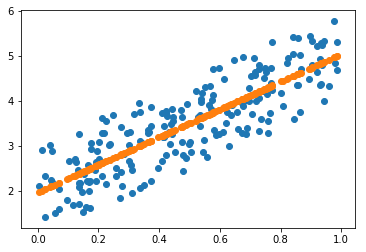

In [18]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [19]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [ ]:
a = nn.Parameter(tensor(-1.,1))
n_iter = 200

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update(a,x,y,mse,lr)
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 200), interval=20)

In [21]:
print('Predicted = ', str(a))
print('Expected = ', str(to_find))

Predicted =  Parameter containing:
tensor([3.0818, 1.9618], requires_grad=True)
Expected =  tensor([3., 2.])


# Try to predict a quadratic function

y = x^2*a + x*b + c

In [22]:
# Expected parameters values
to_find = tensor(.2, .1, -1);

In [23]:
x = torch.ones(n,3) 
x[:,1].uniform_(-2,2) # x^1
x[:,0] = x[:,1]**2 # x^2
x[:5]

tensor([[ 2.7829, -1.6682,  1.0000],
        [ 3.2078,  1.7910,  1.0000],
        [ 0.0273,  0.1652,  1.0000],
        [ 0.5322,  0.7295,  1.0000],
        [ 0.2088, -0.4569,  1.0000]])

In [24]:
y = x@to_find + torch.ones(n).uniform_(-1, 1)*.2
# VERY IMPORTANT: y is a constant tensor so it sholuldn't be attached to gradient
y.detach().requires_grad = False

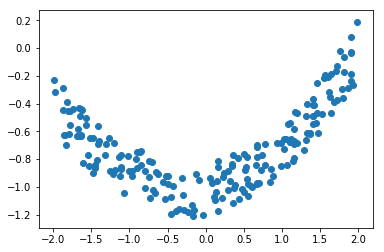

In [25]:
xxx = plt.scatter(x[:,1], y);

In [26]:
lr = 1e-2

In [27]:
a =  nn.Parameter(tensor(.1,.2,.3)) # Starting point
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))

Loss =  (tensor(1.4162, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.0699, 0.1953, 0.2766], requires_grad=True))
Loss =  (tensor(1.2743, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.0425, 0.1908, 0.2546], requires_grad=True))
Loss =  (tensor(1.1532, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.0175, 0.1865, 0.2337], requires_grad=True))


In [ ]:
a = nn.Parameter(tensor(-.2,.3, -.1))
lr = 5e-2
n_iter = 600

fig = plt.figure()
plt.scatter(x[:,1], y, c='orange')
scat = plt.scatter(x[:,1], x@a)
plt.close()

def animate(i):
    update(a,x,y,mse,lr)
    new_values = tensor((x[:,1]).numpy(),tensor((x@a)).detach().numpy()).numpy().T # Converts tu [N,2]
    scat.set_offsets(new_values)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 200), interval=20)

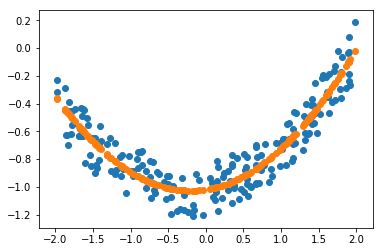

In [29]:
#Final prediction
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],x@a);

In [30]:
print('Predicted = ', str(a))
print('Expected = ', str(to_find))

Predicted =  Parameter containing:
tensor([ 0.2101,  0.0851, -1.0186], requires_grad=True)
Expected =  tensor([ 0.2000,  0.1000, -1.0000])


# Try to predict a polynomial function

y = an*x^n + ... + a1*x + a0

In [31]:
n = 300 
n_iter = 800 

In [32]:
# Expected parameters values
to_find = tensor(-.24, .1, -.2, .3, .2);
poly_size = len(to_find) # It's (polynomial degree + 1)

Make function parametric on 't'

In [33]:
t = torch.ones(n,1).uniform_(-2,2)

In [34]:
x = torch.ones(n,poly_size)
for i in range(1,poly_size):
    x[:,i] = t[:,0]**i # oakward syntax...
x[:5]

tensor([[ 1.0000e+00, -1.8808e+00,  3.5374e+00, -6.6533e+00,  1.2514e+01],
        [ 1.0000e+00,  4.9075e-01,  2.4084e-01,  1.1819e-01,  5.8003e-02],
        [ 1.0000e+00, -1.0092e+00,  1.0185e+00, -1.0278e+00,  1.0373e+00],
        [ 1.0000e+00,  1.1752e+00,  1.3811e+00,  1.6231e+00,  1.9074e+00],
        [ 1.0000e+00, -3.3414e-01,  1.1165e-01, -3.7307e-02,  1.2466e-02]])

In [35]:
noise_scale = .25
y = x@to_find + torch.ones(n).uniform_(-1, 1)*noise_scale
# VERY IMPORTANT: y is a constant tensor so it sholuldn't be attached to gradient
y.detach().requires_grad = False

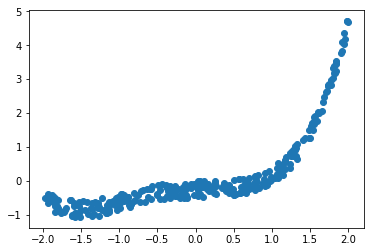

In [36]:
plt.scatter(x[:,1], y);

In [37]:
lr = 1e-2

In [38]:
a =  nn.Parameter(tensor(torch.rand(poly_size))) # Starting point
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))

Loss =  (tensor(9.2478, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.6568, 0.9185, 0.0697, 0.3573, 0.1901], requires_grad=True))
Loss =  (tensor(2.8632, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.6316, 0.8928, 0.0302, 0.2951, 0.0880], requires_grad=True))
Loss =  (tensor(1.5829, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.6143, 0.8722, 0.0118, 0.2477, 0.0506], requires_grad=True))


In [ ]:
a = nn.Parameter(tensor(torch.rand(poly_size)/10.)) # Initialize with small values
lr = 1e-2

fig = plt.figure()
plt.scatter(x[:,1], y, c='orange')
scat = plt.scatter(x[:,1], x@a)
plt.close()

def animate(i):
    update(a,x,y,mse,lr)
    new_values = tensor((x[:,1]).numpy(),tensor((x@a)).detach().numpy()).numpy().T # Converts tu [N,2]
    scat.set_offsets(new_values)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 200), interval=20)

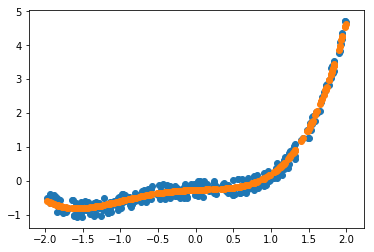

In [40]:
#Final prediction
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],x@a);

In [41]:
print('Predicted = ', str(a))
print('Expected = ', str(to_find))

Predicted =  Parameter containing:
tensor([-0.2714,  0.0920, -0.1097,  0.3055,  0.1737], requires_grad=True)
Expected =  tensor([-0.2400,  0.1000, -0.2000,  0.3000,  0.2000])


**IMPORTANT:** noise_scale influence the result.